# Python packages for playing with geospatial data

* haversine: computes straight line distance
* folum: python wrapper for leaflet.js

In [1]:
% reset
% config InlineBackend.figure_format = 'retina'

import folium
# pip install folium
# https://folium.readthedocs.io/en/latest

from haversine import haversine
# pip install haversine
# https://pypi.python.org/pypi/haversine

% matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']
sns.set(style='whitegrid', context ='paper')


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
# geocoding an address using built-in python tools

import requests
url = 'https://maps.googleapis.com/maps/api/geocode/json'
params = {'sensor': 'false', 'address': 'UCSD Galbraith Hall, Galbraith Hall, San Diego, CA'}
r = requests.get(url, params=params)
results = r.json()['results']
location = results[0]['geometry']['location']
location['lat'], location['lng']


(32.8738007, -117.2409754)

In [5]:
# simplified method using geocoder package
# https://pypi.python.org/pypi/geocoder
# pip install geocoder

import geocoder
g = geocoder.google('UCSD Galbraith Hall, Galbraith Hall, San Diego, CA')
g.json


{'accuracy': 'ROOFTOP',
 'address': '1000 Scholars Dr S, La Jolla, CA 92093, USA',
 'bbox': {'northeast': [32.87514968029149, -117.2396264197085],
  'southwest': [32.87245171970849, -117.2423243802915]},
 'city': 'San Diego',
 'confidence': 9,
 'country': 'US',
 'county': 'San Diego County',
 'encoding': 'utf-8',
 'housenumber': '1000',
 'lat': 32.8738007,
 'lng': -117.2409754,
 'location': 'UCSD Galbraith Hall, Galbraith Hall, San Diego, CA',
 'neighborhood': 'La Jolla',
 'ok': True,
 'place': 'ChIJkXd1K8YG3IARYA0jJvpNBXA',
 'postal': '92093',
 'provider': 'google',
 'quality': 'establishment',
 'state': 'CA',
 'status': 'OK',
 'status_code': 200,
 'street': 'Scholars Dr S'}

In [6]:
g.latlng

[32.8738007, -117.2409754]

In [7]:
# reverse geocoding a lat/lng to an address

g = geocoder.google(g.latlng, method='reverse')
g.json


{'accuracy': 'ROOFTOP',
 'address': 'Galbraith Hall, San Diego, CA 92161, USA',
 'bbox': {'northeast': [32.8750694802915, -117.2395832697085],
  'southwest': [32.8723715197085, -117.2422812302915]},
 'city': 'San Diego',
 'confidence': 9,
 'country': 'US',
 'county': 'San Diego County',
 'encoding': 'utf-8',
 'lat': 32.8737102,
 'lng': -117.2409723,
 'location': '32.8738007, -117.2409754',
 'neighborhood': 'La Jolla',
 'ok': True,
 'place': 'ChIJbW_P3MUG3IARVR28VD4llLs',
 'postal': '92161',
 'provider': 'google',
 'quality': 'premise',
 'state': 'CA',
 'status': 'OK',
 'status_code': 200}

In [8]:
# working with shapefiles
# neighborhood shapefile data from Zillow:
# https://www.zillow.com/howto/api/neighborhood-boundaries.htm
#
# shapefile package: pyshp
# https://pypi.python.org/pypi/pyshp
# pip install pyshp

import shapefile
sf = shapefile.Reader("ZillowNeighborhoods-RI.shp")
shapes = sf.shapes()


In [9]:
 shapes[0].points

[(-71.36572999999999, 41.858280000000036),
 (-71.36396141399996, 41.85848524600004),
 (-71.36259364299997, 41.85864397700004),
 (-71.35926339599996, 41.85903045600003),
 (-71.33413851099994, 41.86194622200003),
 (-71.33439699999997, 41.86130000000003),
 (-71.33489699999996, 41.860600000000034),
 (-71.33719899999994, 41.855905000000064),
 (-71.33722731299997, 41.85584866000005),
 (-71.33722952299996, 41.855842489000054),
 (-71.33739699999995, 41.85550000000006),
 (-71.33739666999998, 41.855134306000025),
 (-71.33767399999994, 41.85501900000003),
 (-71.33820499999996, 41.85470900000007),
 (-71.33851199999998, 41.85460000000006),
 (-71.33888999999994, 41.854588000000035),
 (-71.33905199999998, 41.85454800000008),
 (-71.33921899999996, 41.854472000000044),
 (-71.33961199999999, 41.85435300000006),
 (-71.33972099999994, 41.854299000000026),
 (-71.33977099999998, 41.85422700000004),
 (-71.33978899999994, 41.85414700000007),
 (-71.33981299999994, 41.85362200000003),
 (-71.33983799999999, 41.8

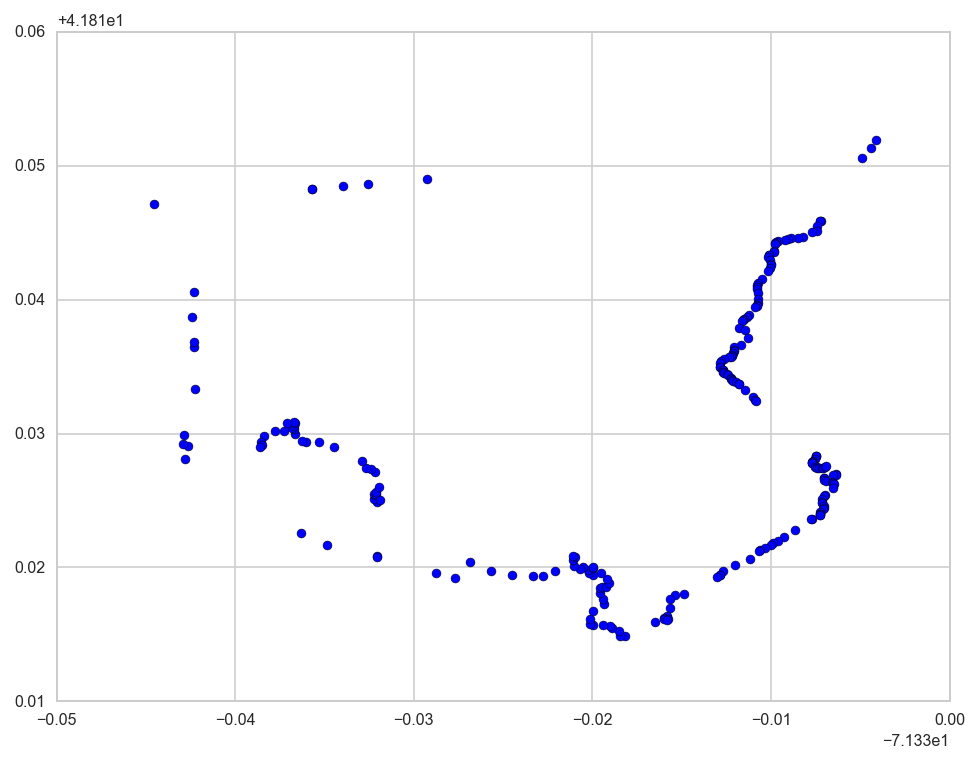

In [10]:
j=0
for i in range(len(shapes[j].points)):
    plt.scatter(shapes[j].points[i][0], shapes[j].points[i][1])

plt.show()

## Working with shapefiles
#### There are many issues with geospatial analyses, as I outlined in lecture.
#### One is how you aggregate data so that you can analyze them.
#### One way is to break up a geographic region into equally-sized units (hexagonal tiling, for example).
#### But, for the sake of interpretability and intuitiveness, neighborhood boundaries work quite well.
#### Here's one way of doing that using shapefiles, which are just a way of storing geographic boundaries as sets of lat/lng pairs that outline a region and associate it with metadata about that region.
#### Thankfully the real estate website Zillow has done this hard work and made the shapefiles freely available.

In [11]:
# working with shapefiles
# neighborhood shapefile data from Zillow:
# https://www.zillow.com/howto/api/neighborhood-boundaries.htm
#
# shapefile package: pyshp
# https://pypi.python.org/pypi/pyshp
# pip install pyshp

import shapefile

# read the in the shapefile and list the methods associated with the object
sf = shapefile.Reader("ZillowNeighborhoods-CA.shp")
dir(sf)

['_Reader__dbfHdrLength',
 '_Reader__dbfHeader',
 '_Reader__getFileObj',
 '_Reader__recStruct',
 '_Reader__record',
 '_Reader__recordFmt',
 '_Reader__recordLength',
 '_Reader__restrictIndex',
 '_Reader__shape',
 '_Reader__shapeIndex',
 '_Reader__shpHeader',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_offsets',
 'bbox',
 'dbf',
 'elevation',
 'fields',
 'iterRecords',
 'iterShapeRecords',
 'iterShapes',
 'load',
 'measure',
 'numRecords',
 'record',
 'records',
 'shape',
 'shapeName',
 'shapeRecord',
 'shapeRecords',
 'shapeType',
 'shapes',
 'shp',
 'shpLength',
 'shx']

In [12]:
# read in the dbf (metadata) file and list all the methods associated with it
sfdbf = shapefile.Reader("ZillowNeighborhoods-CA.dbf")
dir(sfdbf)

['_Reader__dbfHdrLength',
 '_Reader__dbfHeader',
 '_Reader__getFileObj',
 '_Reader__recStruct',
 '_Reader__record',
 '_Reader__recordFmt',
 '_Reader__recordLength',
 '_Reader__restrictIndex',
 '_Reader__shape',
 '_Reader__shapeIndex',
 '_Reader__shpHeader',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_offsets',
 'bbox',
 'dbf',
 'elevation',
 'fields',
 'iterRecords',
 'iterShapeRecords',
 'iterShapes',
 'load',
 'measure',
 'numRecords',
 'record',
 'records',
 'shape',
 'shapeName',
 'shapeRecord',
 'shapeRecords',
 'shapeType',
 'shapes',
 'shp',
 'shpLength',
 'shx']

In [13]:
metadata = sfdbf.shapeRecords()
metadata[38].record


['CA', 'San Diego', 'San Diego', 'Ocean Beach', '117021']

In [14]:
# find indices of all San Diego neighborhoods
sd_list = []
counter = 0

for i in range(len(metadata)):
    if metadata[i].record[2] == 'San Diego':
        sd_list.append(i)
        counter += 1


In [15]:
shapes = sf.shapes()

sd_shapes = []

for i in range(len(sd_list)):
    sd_shapes.append(shapes[sd_list[i]].points)

for i in range(len(sd_shapes)):
    for j in range(len(sd_shapes[i])):
        sd_shapes[i][j] = sd_shapes[i][j][::-1]


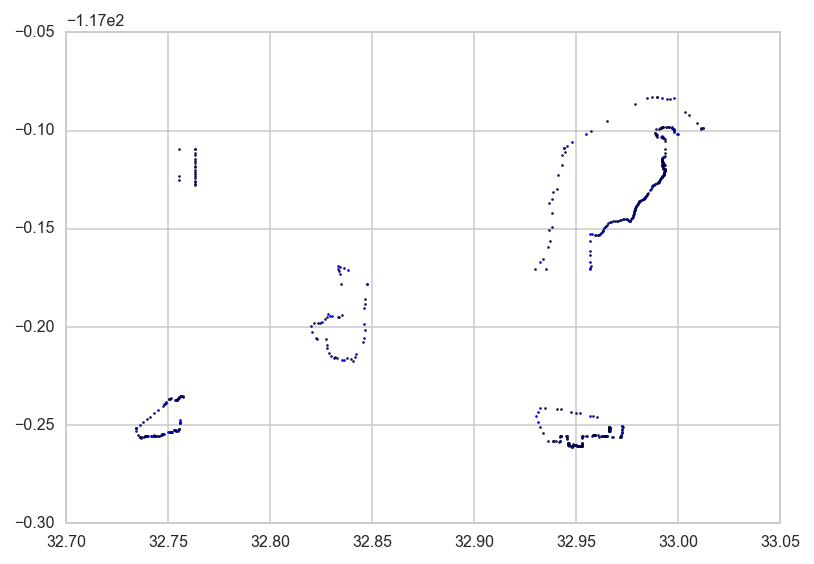

In [14]:
temp_shapes = sd_shapes[0:5]

for i in range(len(temp_shapes)):
    for j in range(len(temp_shapes[i])):
        plt.scatter(temp_shapes[i][j][0], temp_shapes[i][j][1], s=1)

plt.show()


In [16]:
# two coordinates

coordinate_1 = [32.8738007, -117.2409754]
coordinate_2 = [32.8709, -117.2108]


In [17]:
# Computes the distance between two points in kilometers
haversine(coordinate_1, coordinate_2)


2.836497001571131

In [18]:
# Distance in miles
haversine(coordinate_1, coordinate_2, miles=True)


1.762516978363255

In [19]:
lat = coordinate_1[0]
lon = coordinate_1[1]
zoom_start = 14

m = folium.Map(location=[lat, lon], zoom_start=zoom_start)

kw = dict(fill_color='red', radius=20)
c0 = folium.CircleMarker(coordinate_1, **kw)
c1 = folium.CircleMarker(coordinate_2, **kw)

for c in [c0, c1]:
    m.add_child(c)

m

In [20]:
m = folium.Map(location=[lat, lon], zoom_start=zoom_start, tiles='Stamen Toner')

for c in range(len(sd_shapes)):
    hood_line = folium.PolyLine(locations=sd_shapes[c], weight=2, color = 'blue')
    m.add_child(hood_line)

m


In [21]:
# GET COLORS HERE: http://colorbrewer2.org


m = folium.Map(location=[lat, lon], zoom_start=zoom_start, tiles='Stamen Toner')

for c in range(len(sd_shapes)):
    hood_line = folium.features.PolygonMarker(locations=sd_shapes[c], color='#FF0000', fill_color='#fc8d50', weight=5)
    m.add_child(hood_line)

m